In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import os

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [71]:
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'

In [3]:
os.getcwd()

'C:\\Users\\sgs4176\\Jupyter'

In [4]:
dict_test = {'a':'a', 'b':'b'}

In [5]:
try:
    import cPickle as pickle
except ImportError: 
    import pickle

In [6]:
dump_dict = pickle.dumps(dict_test)

In [7]:
dump_dict

b'\x80\x03}q\x00(X\x01\x00\x00\x00aq\x01h\x01X\x01\x00\x00\x00bq\x02h\x02u.'

In [8]:
pickle.loads(dump_dict)

{'a': 'a', 'b': 'b'}

# 1. Dataset

In [54]:
df = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')

In [55]:
df = df.dropna()

In [56]:
df.shape #df.dropna().shape

(6825, 16)

In [57]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [59]:
df.info

<bound method DataFrame.info of                                                Name Platform  Year_of_Release  \
0                                        Wii Sports      Wii           2006.0   
2                                    Mario Kart Wii      Wii           2008.0   
3                                 Wii Sports Resort      Wii           2009.0   
6                             New Super Mario Bros.       DS           2006.0   
7                                          Wii Play      Wii           2006.0   
8                         New Super Mario Bros. Wii      Wii           2009.0   
11                                    Mario Kart DS       DS           2005.0   
13                                          Wii Fit      Wii           2007.0   
14                               Kinect Adventures!     X360           2010.0   
15                                     Wii Fit Plus      Wii           2009.0   
16                               Grand Theft Auto V      PS3           2013.0

In [60]:
df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

In [62]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


# 2. DataFrame.plot()

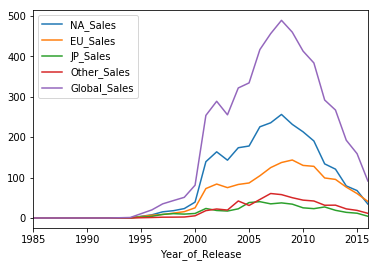

In [63]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot();

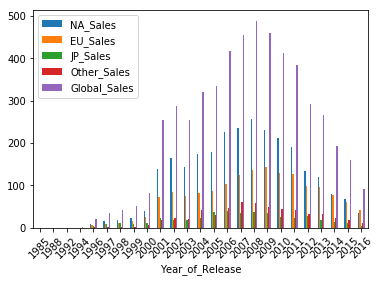

In [68]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar', rot=45);

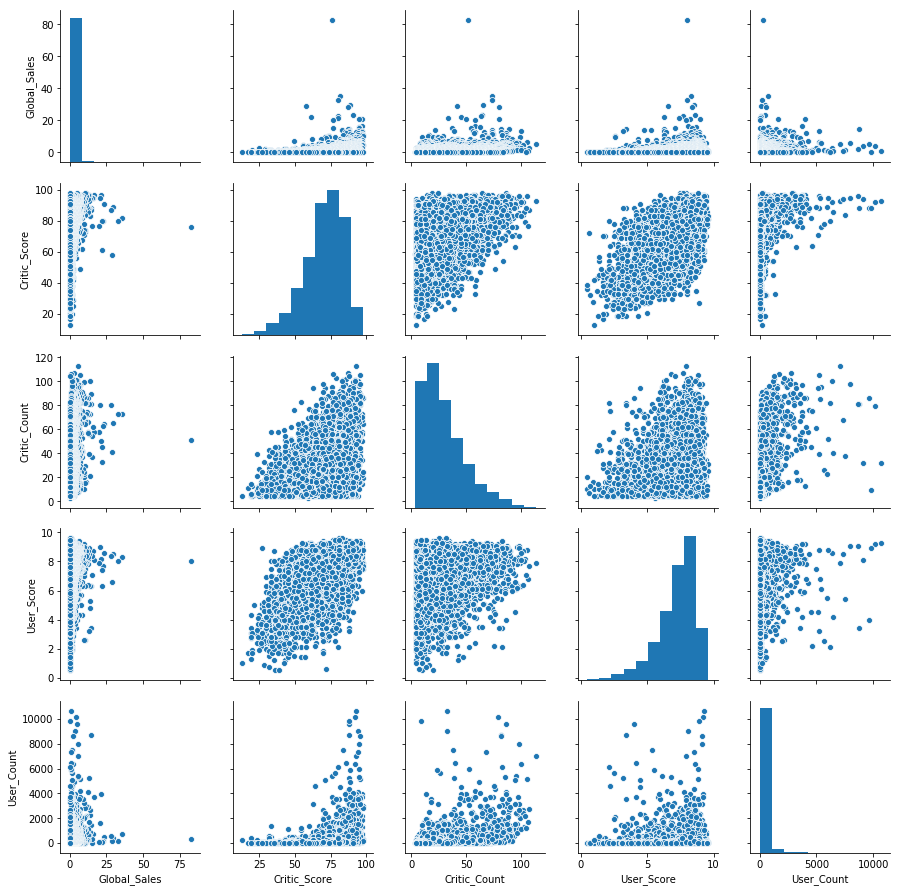

In [69]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count', 
                 'User_Score', 'User_Count']]);

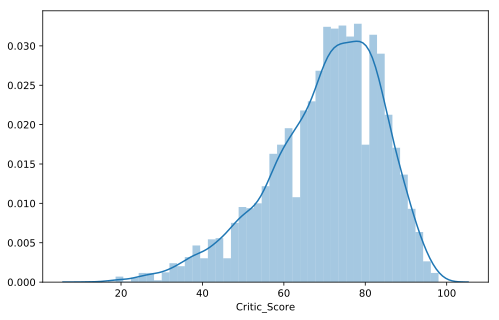

In [72]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df['Critic_Score']);

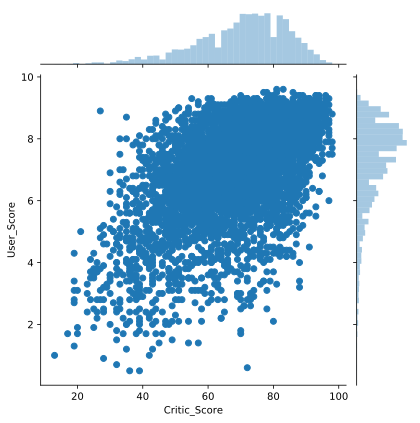

In [73]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='scatter');

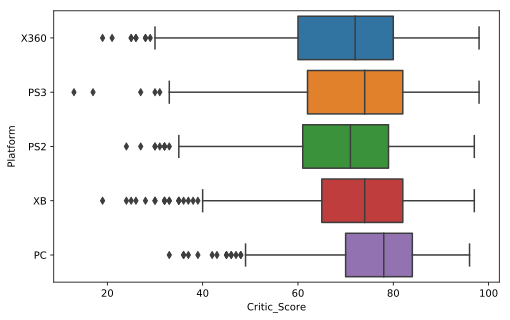

In [74]:
top_platforms = df['Platform'].value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", 
            data=df[df['Platform'].isin(top_platforms)], orient="h");

In [75]:
df['Platform'].value_counts().sort_values(ascending=False).head(5).index.values

array(['PS2', 'X360', 'PS3', 'PC', 'XB'], dtype=object)

In [76]:
df['Platform'].value_counts().sort_values(ascending=False).head(5)

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Name: Platform, dtype: int64

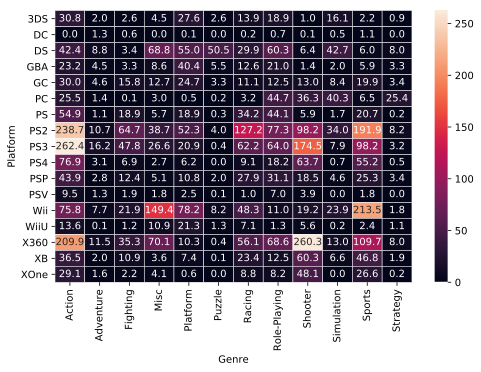

In [78]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5);